In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-4
for g in gamma:
    print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search gpt2, lr: 0.0001 ,focal loss, gamma: 2


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.8777	Val Loss:	0.6516	Accuracy:	0.7199	F1:	0.5573
2 / 10: Train Loss:	0.3371	Val Loss:	0.6209	Accuracy:	0.7309	F1:	0.6457
3 / 10: Train Loss:	0.3094	Val Loss:	0.5933	Accuracy:	0.7681	F1:	0.6921
4 / 10: Train Loss:	0.2912	Val Loss:	0.5705	Accuracy:	0.7877	F1:	0.7123
5 / 10: Train Loss:	0.2588	Val Loss:	0.5556	Accuracy:	0.7834	F1:	0.7196
6 / 10: Train Loss:	0.2455	Val Loss:	0.5501	Accuracy:	0.7856	F1:	0.7435
7 / 10: Train Loss:	0.1986	Val Loss:	0.4703	Accuracy:	0.8293	F1:	0.7605
8 / 10: Train Loss:	0.1568	Val Loss:	0.4148	Accuracy:	0.8337	F1:	0.7495
9 / 10: Train Loss:	0.1414	Val Loss:	0.5406	Accuracy:	0.7112	F1:	0.6870
10 / 10: Train Loss:	0.1195	Val Loss:	0.5391	Accuracy:	0.7199	F1:	0.6948
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.48      0.83      0.61       119
      struct       0.92      0.68      0.78       338

    accuracy               

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.5959	Val Loss:	0.7083	Accuracy:	0.4508	F1:	0.4492
2 / 10: Train Loss:	0.0974	Val Loss:	0.6823	Accuracy:	0.5974	F1:	0.5648
3 / 10: Train Loss:	0.0876	Val Loss:	0.6631	Accuracy:	0.6761	F1:	0.6190
4 / 10: Train Loss:	0.0823	Val Loss:	0.6360	Accuracy:	0.7681	F1:	0.6766
5 / 10: Train Loss:	0.0812	Val Loss:	0.6104	Accuracy:	0.7987	F1:	0.6818
6 / 10: Train Loss:	0.0766	Val Loss:	0.6134	Accuracy:	0.7768	F1:	0.6888
7 / 10: Train Loss:	0.0682	Val Loss:	0.5945	Accuracy:	0.7856	F1:	0.6929
8 / 10: Train Loss:	0.0678	Val Loss:	0.5765	Accuracy:	0.8009	F1:	0.7098
9 / 10: Train Loss:	0.0642	Val Loss:	0.5698	Accuracy:	0.8053	F1:	0.7360
10 / 10: Train Loss:	0.0588	Val Loss:	0.5857	Accuracy:	0.7899	F1:	0.7455
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.58      0.71      0.64       119
      struct       0.89      0.82      0.85       338

    accuracy                           0.79       457
   macro avg      

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.4029	Val Loss:	0.6700	Accuracy:	0.6827	F1:	0.5164
2 / 10: Train Loss:	0.0100	Val Loss:	0.7089	Accuracy:	0.4464	F1:	0.4433
3 / 10: Train Loss:	0.0086	Val Loss:	0.7120	Accuracy:	0.4311	F1:	0.4309
4 / 10: Train Loss:	0.0078	Val Loss:	0.6973	Accuracy:	0.5252	F1:	0.5094
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.31      0.66      0.42       119
      struct       0.80      0.48      0.60       338

    accuracy                           0.53       457
   macro avg       0.55      0.57      0.51       457
weighted avg       0.67      0.53      0.55       457

test results:
              precision    recall  f1-score   support

       bknow       0.31      0.60      0.41        67
      struct       0.79      0.52      0.63       189

    accuracy                           0.54       256
   macro avg       0.55      0.56      0.52       256
weighted av

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.2662	Val Loss:	0.6954	Accuracy:	0.5427	F1:	0.4938
2 / 10: Train Loss:	0.0002	Val Loss:	0.7241	Accuracy:	0.3982	F1:	0.3982
3 / 10: Train Loss:	0.0002	Val Loss:	0.7169	Accuracy:	0.4464	F1:	0.4437
4 / 10: Train Loss:	0.0003	Val Loss:	0.7293	Accuracy:	0.3654	F1:	0.3632
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.27      0.82      0.40       119
      struct       0.76      0.21      0.33       338

    accuracy                           0.37       457
   macro avg       0.51      0.51      0.36       457
weighted avg       0.63      0.37      0.35       457

test results:
              precision    recall  f1-score   support

       bknow       0.29      0.79      0.42        67
      struct       0.80      0.30      0.44       189

    accuracy                           0.43       256
   macro avg       0.54      0.55      0.43       256
weighted av

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

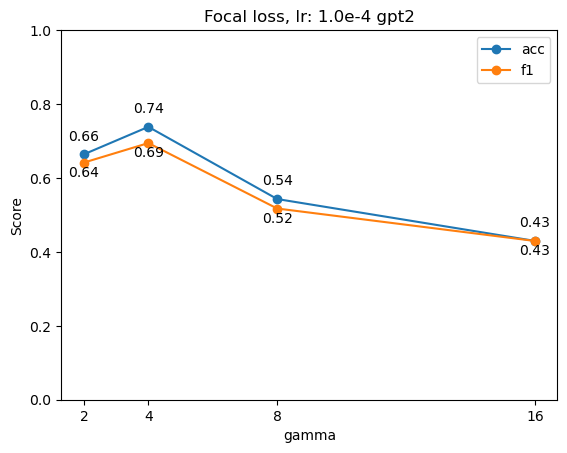

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-4 {model_checkpoint}')